No configuration for shape_dilation found, parameter will be set to 0
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for poly_compression_factor found, parameter will be set to 10
No configuration for path_optimization found, parameter will be set to hilbert
No configuration for greedy_k found, parameter will be set to 0
No configuration for hilbert_p found, parameter will be set to 7
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for processes found, parameter will be set to 10
No configuration for join_intersecting found, parameter will be set to True
sanity check for cell set 0
cell set 0 passed sanity check
Convert label format into coordinate format


Conversion finished, sanity check
Check failed, returned lengths do not match cell set.
 Some classes were not found in the segmentation and were therefore removed.
 Please make sure all classes specified are present in your segmentation.
1 classes were not found and therefore removed.
Check passed
Check passed


  0%|                                                                                                                                                                | 0/208 [00:00<?, ?it/s]

  0%|▋                                                                                                                                                       | 1/208 [00:00<03:20,  1.03it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:01<00:00, 206.24it/s]

Create shapes for merged cells


  0%|                                                                                                                                                                | 0/208 [00:00<?, ?it/s]

  0%|▋                                                                                                                                                       | 1/208 [00:00<03:09,  1.09it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 211.18it/s]

Calculating polygons


  0%|                                                                                                                                                                | 0/208 [00:00<?, ?it/s]

  0%|▋                                                                                                                                                       | 1/208 [00:00<03:15,  1.06it/s]

  1%|██▏                                                                                                                                                     | 3/208 [00:01<01:01,  3.31it/s]

  8%|███████████▌                                                                                                                                           | 16/208 [00:01<00:08, 21.97it/s]

 11%|███████████████▉                                                                                                                                       | 22/208 [00:01<00:06, 27.66it/s]

 19%|█████████████████████████████                                                                                                                          | 40/208 [00:01<00:03, 50.33it/s]

 28%|██████████████████████████████████████████                                                                                                             | 58/208 [00:01<00:02, 73.80it/s]

 33%|██████████████████████████████████████████████████                                                                                                     | 69/208 [00:01<00:01, 80.38it/s]

 39%|██████████████████████████████████████████████████████████▊                                                                                            | 81/208 [00:01<00:01, 89.39it/s]

 44%|██████████████████████████████████████████████████████████████████▊                                                                                    | 92/208 [00:01<00:01, 93.24it/s]

 51%|████████████████████████████████████████████████████████████████████████████▋                                                                        | 107/208 [00:02<00:00, 101.17it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 124/208 [00:02<00:00, 104.08it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 144/208 [00:02<00:00, 120.69it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 157/208 [00:02<00:00, 117.66it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 170/208 [00:02<00:00, 116.79it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 189/208 [00:02<00:00, 125.97it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 202/208 [00:02<00:00, 117.25it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:02<00:00, 73.58it/s]

Polygon calculation finished
Current path length: 98,744.36 units
Path optimizer defined in config: hilbert


Optimized path length: 98,744.36 units
Optimization factor: 1.0x


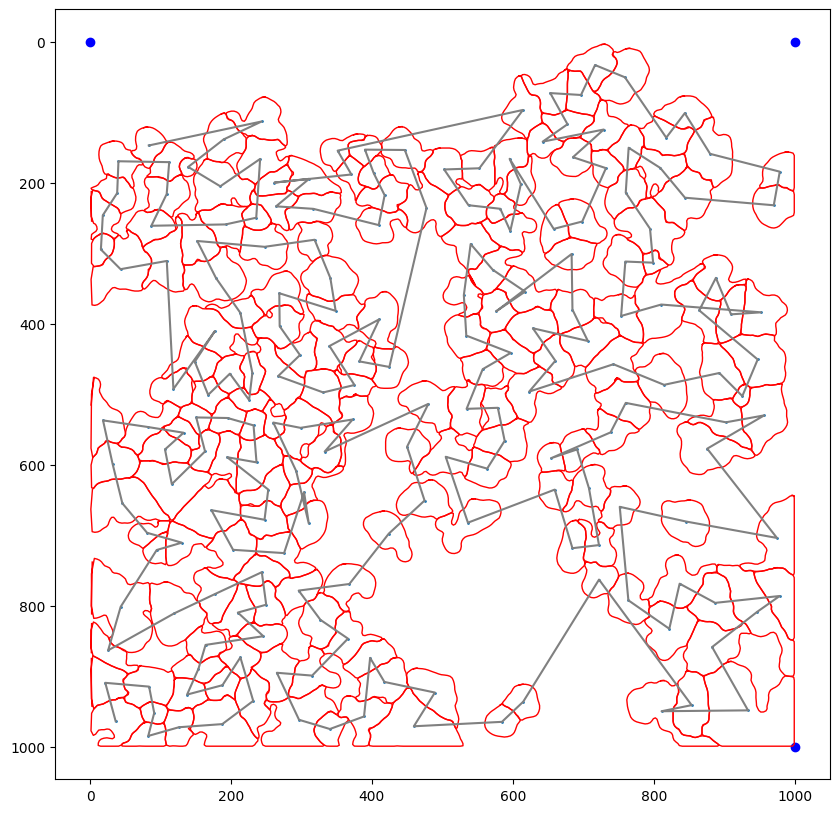

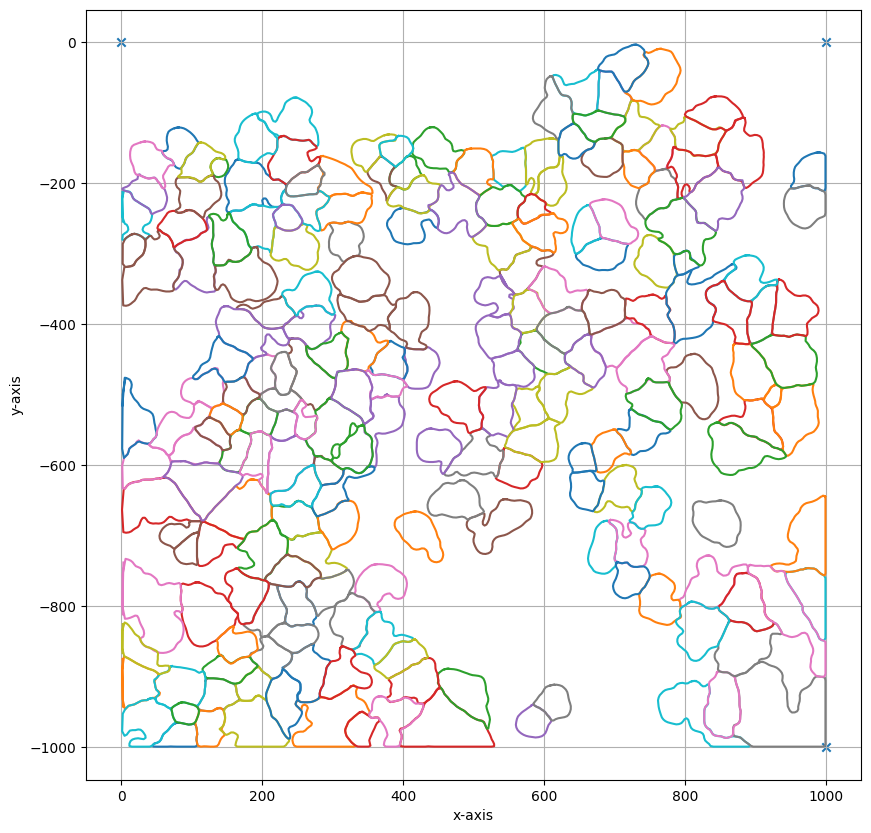

In [1]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im).astype(np.uint32)

all_classes = np.unique(segmentation)

cell_sets = [{"classes": all_classes, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]])
}

sl = SegmentationLoader(config = loader_config, verbose=True)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(fig_size = (10, 10))


In [2]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = all_classes #np.array_split(all_classes[indices],2)

cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = True)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = True, fig_size = (10, 10))




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [3]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'none',
    'convolution_smoothing':1,
    'join_intersecting': False,
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))


loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 10,
    'poly_compression_factor': 20,
    'path_optimization': 'none',
    'convolution_smoothing':40,
    'join_intersecting': False,
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))



FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [4]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='conv1.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':40,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='conv40.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':80,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='conv80.png')




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [5]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='bin0.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 15,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='bin15.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 30,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='bin30.png')




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [6]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 5,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':20,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))
shape_collection.plot(calibration = False, fig_size = (5, 5), mode='dots')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 5,
    'poly_compression_factor': 20,
    'path_optimization': 'hilbert',
    'convolution_smoothing':20,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))
shape_collection.plot(calibration = False, fig_size = (5, 5), mode='dots')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 5,
    'poly_compression_factor': 40,
    'path_optimization': 'hilbert',
    'convolution_smoothing':20,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))
shape_collection.plot(calibration = False, fig_size = (5, 5), mode='dots')




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [7]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':3,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 10,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':3,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 10,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':3,
    'join_intersecting': True,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [8]:
off = np.array([10, -8])
np.max(np.array([off, [0,0]]), axis=0) 

array([10,  0])